In [2]:
# accuracy comparation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

def neural_network_experiment(X, y, optimizer='adam', n_splits=10):
    """
    Evaluate a simple neural network with the specified optimizer over multiple experiments.
    """
    accuracies = []
    f1_scores = []

    for _ in range(n_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)

        # Initialize MLPClassifier with specified optimizer
        nn_clf = MLPClassifier(solver=optimizer, max_iter=500, random_state=42)
        nn_clf.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = nn_clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average accuracy and F1 score
    avg_accuracy = np.mean(accuracies)
    avg_f1 = np.mean(f1_scores)

    print(f"Optimizer: {optimizer} - Average Accuracy: {avg_accuracy:.4f}, Average F1 Score: {avg_f1:.4f}")
    return avg_accuracy, avg_f1

if __name__ == '__main__':
    # Load data
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')

    # Run experiments for both Adam and SGD optimizers
    print("Neural Network Performance with Adam Optimizer")
    adam_accuracy, adam_f1 = neural_network_experiment(X, y, optimizer='adam', n_splits=10)

    print("\nNeural Network Performance with SGD Optimizer")
    sgd_accuracy, sgd_f1 = neural_network_experiment(X, y, optimizer='sgd', n_splits=10)

    # Compare results
    print("\nComparison Summary:")
    print(f"Adam Optimizer - Average Accuracy: {adam_accuracy:.4f}, Average F1 Score: {adam_f1:.4f}")
    print(f"SGD Optimizer - Average Accuracy: {sgd_accuracy:.4f}, Average F1 Score: {sgd_f1:.4f}")


Neural Network Performance with Adam Optimizer
Optimizer: adam - Average Accuracy: 0.6408, Average F1 Score: 0.6290

Neural Network Performance with SGD Optimizer


d:\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic

Optimizer: sgd - Average Accuracy: 0.6039, Average F1 Score: 0.5710

Comparison Summary:
Adam Optimizer - Average Accuracy: 0.6408, Average F1 Score: 0.6290
SGD Optimizer - Average Accuracy: 0.6039, Average F1 Score: 0.5710


d:\python3.10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Performance with Adam Optimizer
Optimizer: adam - Average Accuracy: 0.6408, Average F1 Score: 0.6290, Average Training Time: 1.4845 seconds

Neural Network Performance with SGD Optimizer
Optimizer: sgd - Average Accuracy: 0.6202, Average F1 Score: 0.5979, Average Training Time: 5.9295 seconds


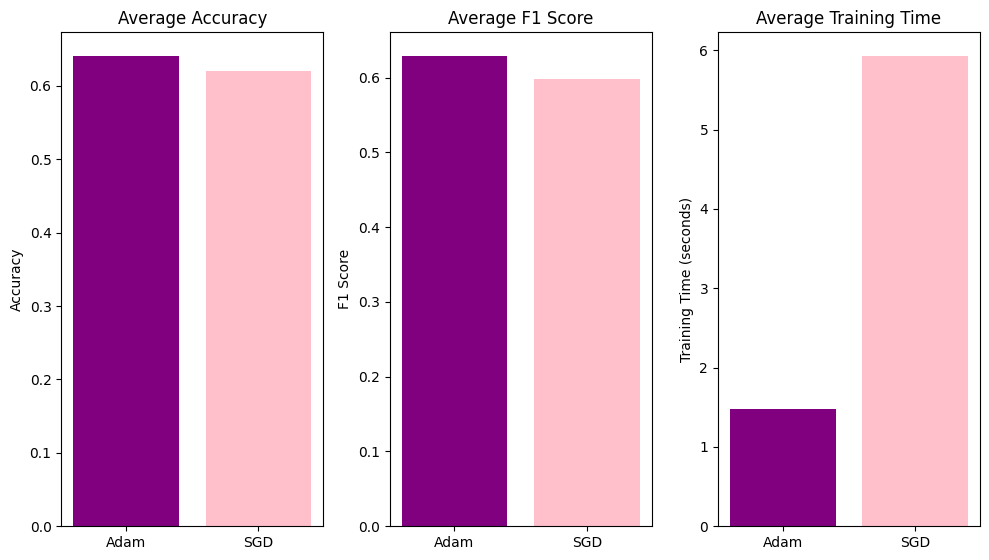

In [5]:
# time comparation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

def neural_network_experiment(X, y, optimizer='adam', n_splits=10):
    """
    Evaluate a simple neural network with the specified optimizer over multiple experiments.
    """
    accuracies = []
    f1_scores = []
    training_times = []

    for _ in range(n_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)

        # Initialize MLPClassifier with specified optimizer
        nn_clf = MLPClassifier(solver=optimizer, max_iter=2000,random_state=42)

        # Measure training time
        start_time = time.time()
        nn_clf.fit(X_train, y_train)
        training_time = time.time() - start_time
        training_times.append(training_time)

        # Predict and evaluate
        y_pred = nn_clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Calculate average scores and training time
    avg_accuracy = np.mean(accuracies)
    avg_f1 = np.mean(f1_scores)
    avg_training_time = np.mean(training_times)

    print(f"Optimizer: {optimizer} - Average Accuracy: {avg_accuracy:.4f}, Average F1 Score: {avg_f1:.4f}, Average Training Time: {avg_training_time:.4f} seconds")
    return avg_accuracy, avg_f1, avg_training_time

if __name__ == '__main__':
    # Load data
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')

    # Run experiments for both Adam and SGD optimizers
    print("Neural Network Performance with Adam Optimizer")
    adam_accuracy, adam_f1, adam_time = neural_network_experiment(X, y, optimizer='adam', n_splits=10)

    print("\nNeural Network Performance with SGD Optimizer")
    sgd_accuracy, sgd_f1, sgd_time = neural_network_experiment(X, y, optimizer='sgd', n_splits=10)

    # Plot comparison
    labels = ['Adam', 'SGD']
    accuracies = [adam_accuracy, sgd_accuracy]
    f1_scores = [adam_f1, sgd_f1]
    training_times = [adam_time, sgd_time]

    # Create subplots for accuracy, F1 score, and training time
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 3, 1)
    plt.bar(labels, accuracies, color=['purple', 'pink'])
    plt.title('Average Accuracy')
    plt.ylabel('Accuracy')

    plt.subplot(1, 3, 2)
    plt.bar(labels, f1_scores, color=['purple', 'pink'])
    plt.title('Average F1 Score')
    plt.ylabel('F1 Score')

    plt.subplot(1, 3, 3)
    plt.bar(labels, training_times, color=['purple', 'pink'])
    plt.title('Average Training Time')
    plt.ylabel('Training Time (seconds)')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("optimizer_comparison.png", dpi=300)
    plt.show()
